# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
from utils import get_dataset

In [12]:
dataset = get_dataset("data/waymo/training_and_validation/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [13]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # create color map for the classes
    color_map = {1: [1,0,0],4:[0,1,0],2:[0,0,1]}
    
    plt.rcParams['figure.figsize'] = (10,10)
    for element in batch:
        # plot sample
        fig, ax = plt.subplots()
        ax.imshow(element['image'].numpy())
        scale = element['image'].numpy().shape[0]
        
        # plot sample bounding box
        bboxes = element['groundtruth_boxes'].numpy()
        classes = element['groundtruth_classes'].numpy()
        for bb, cl in zip(bboxes,classes):
            y1, x1, y2, x2 = bb*scale
            rec = Rectangle((x1,y1),x2-x1,y2-y1,facecolor='none',edgecolor=color_map[cl])
            ax.add_patch(rec)
        plt.show()
        plt.tight_layout()
        

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

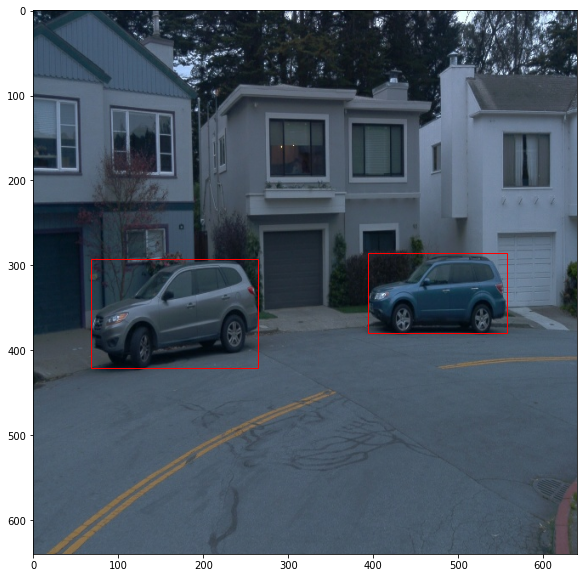

<Figure size 720x720 with 0 Axes>

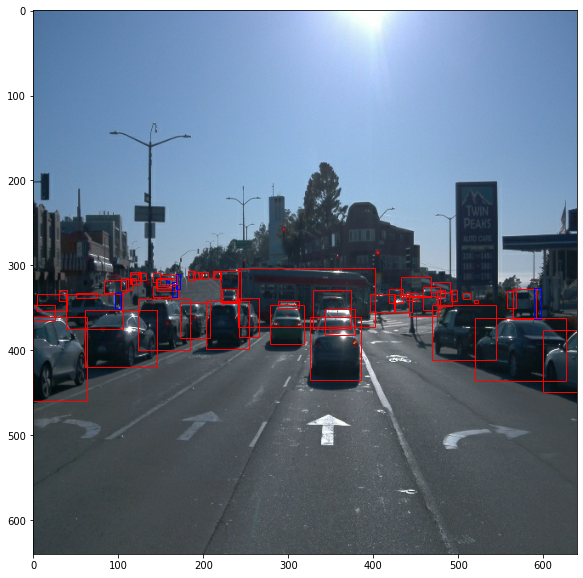

<Figure size 720x720 with 0 Axes>

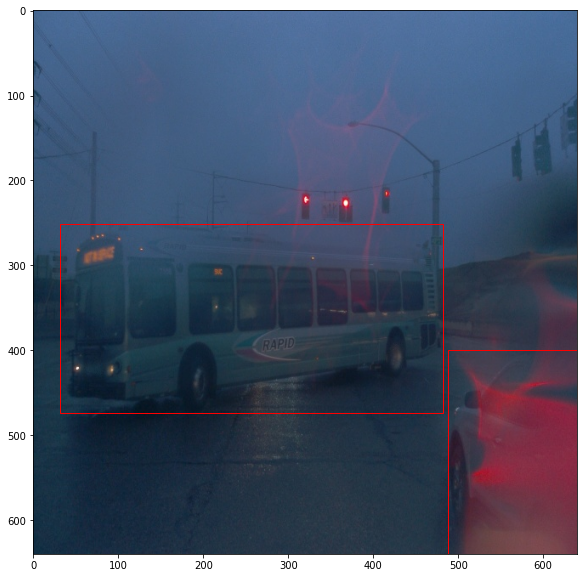

<Figure size 720x720 with 0 Axes>

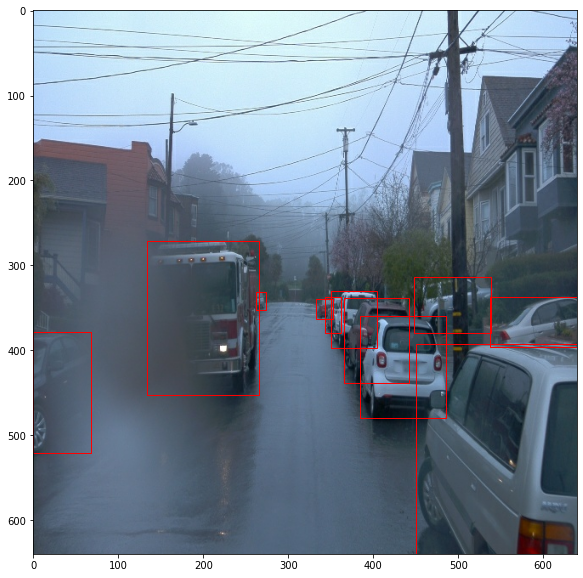

<Figure size 720x720 with 0 Axes>

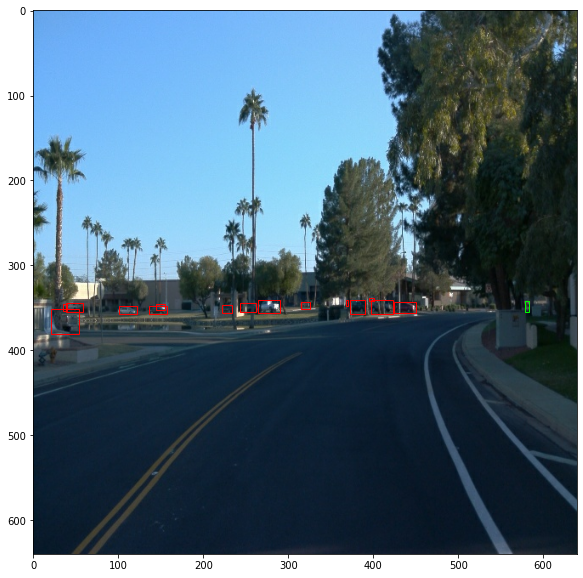

<Figure size 720x720 with 0 Axes>

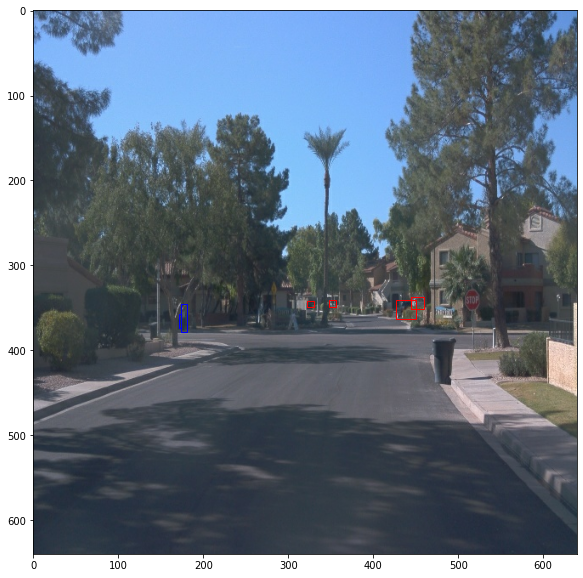

<Figure size 720x720 with 0 Axes>

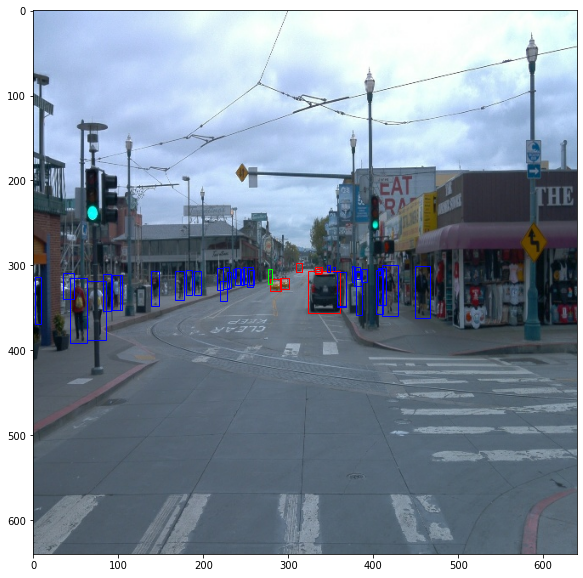

<Figure size 720x720 with 0 Axes>

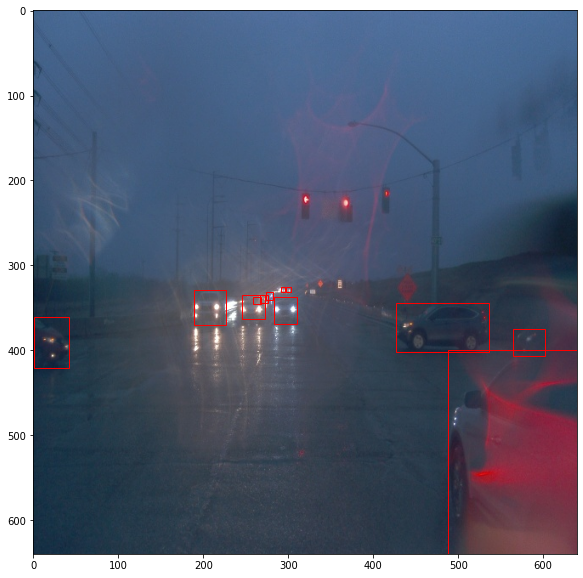

<Figure size 720x720 with 0 Axes>

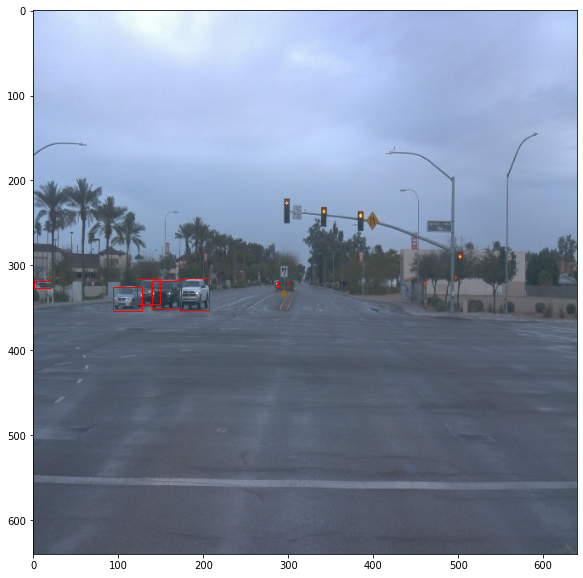

<Figure size 720x720 with 0 Axes>

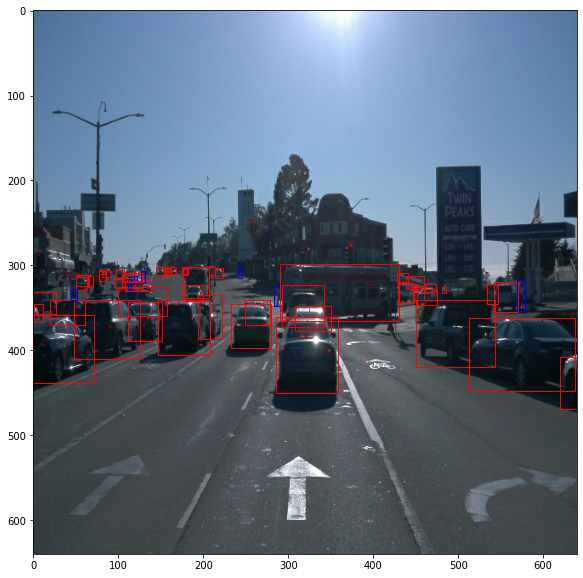

<Figure size 720x720 with 0 Axes>

In [14]:
## shuffle dataset and display 10 images
dataset = dataset.shuffle(97)
display_instances(dataset.take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [10]:
# calculate the total amount of cyclists, pedestrians and cars
def calculate_area(bbox):
    y1, x1, y2, x2 = bbox;
    return (x2 - x1) * (y2 - y1)

cars = 0
pedestrians = 0
cyclists = 0
total_predictions = 0.0
avg_bb_car_area = 0.0
avg_bb_cyclist_area = 0.0
avg_bb_pedestrian_area = 0.0
for element in dataset.take(10000): # analyze a bigger batch
    classes = element['groundtruth_classes'].numpy()
    bboxes = element['groundtruth_boxes'].numpy()
    for cl, bb in zip(classes,bboxes):
        # 1 - cars
        # 4 - cyclists
        # 2 - pedestrians
        if cl == 1:
            cars += 1
            avg_bb_car_area += calculate_area(bb)
        elif cl == 2:
            pedestrians += 1
            avg_bb_pedestrian_area += calculate_area(bb)
        elif cl ==4:
            cyclists += 1
            avg_bb_cyclist_area += calculate_area(bb)
        total_predictions += 1
print("Percentage of cars: ",cars / total_predictions)
print("Percentage of pedestrians ",pedestrians / total_predictions)
print("Percentage of cyclists: ", cyclists / total_predictions)
print("Average car bbox area: ",avg_bb_car_area / cars)
print("Average pedestrian bbox area: ",avg_bb_car_area / pedestrians)
print("Average cyclist bbox area: ",avg_bb_cyclist_area / cyclists)

Percentage of cars:  0.7683560670280083
Percentage of pedestrians  0.2257357411355716
Percentage of cyclists:  0.005908191836420149
Average car bbox area:  0.005270970219803798
Average pedestrian bbox area:  0.017941252577622958
Average cyclist bbox area:  0.002029242926975409


## Conclusion:
    - any training/test split must preserve the same proportion of cyclists, cars, and pedestrians as in the total dataset. So any split set must have proportionally the same amount of objects which has to be detected